<a href="https://colab.research.google.com/github/Thomas-D40/deep-learning/blob/main/Traitement_langage_naturel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Le NLP (Natural Language Processing) inclus tout ce qui est lié à la voix ou du texte.

Cela passe par exemple par:
- reconnaissance vocal
- chatbot
- classification
- topic modeling
- generation
- extraction information
- NER: Name Entity Recognition

# Exploration IMDB Dataset

In [ ]:
import tensorflow as tf

import tensorflow_datasets as tf_ds

In [ ]:
train_data = tf_ds.as_numpy(tf_ds.load("imdb_reviews", split="train"))
test_data = tf_ds.as_numpy(tf_ds.load("imdb_reviews", split="test"))

In [ ]:
imdb_sentences = []
imdb_labels = []

for item in train_data:
  imdb_sentences.append(str(item['text']))
  imdb_labels.append(str(item['label']))

In [ ]:
len(imdb_sentences)

25000

In [ ]:
training_sentences = imdb_sentences[:20000]
test_sentences = imdb_sentences[20000:]

training_labels = np.array(imdb_labels[:20000]).astype(int)
test_labels = np.array(imdb_labels[20000:]).astype(int)

In [ ]:
np.sum(training_labels == 0)

10031

# La Tokenisation

L'objectif est de pouvoir passer d'un texte à un ensemble de vecteurs.

In [ ]:
phrase = "Je suis au marché"

In [ ]:
phrase.split(" ")

['Je', 'suis', 'au', 'marché']

In [ ]:
phrases = ["Je suis au marché", "Je travaille au marché"]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts(phrases)

In [ ]:
tokenizer.word_index

{'je': 1, 'au': 2, 'marché': 3, 'suis': 4, 'travaille': 5}

In [ ]:
tokenizer.texts_to_sequences(phrases)

[[1, 4, 2, 3], [1, 5, 2, 3]]

In [ ]:
test = "Il va au marché"

In [ ]:
tokenizer.texts_to_sequences([test]) # Il ignore "il" & "va" qui sont absents du dataset d'entrainement

[[2, 3]]

# Out Of Vocabulary

In [ ]:
tokenizer_v2 = Tokenizer(num_words=1000, oov_token="<OOV>") # permet de définir le nombre de mots dans le dictionnaire ainsi qu'une valeur out of vocabulary pour ce qu'il ignore
tokenizer_v2.fit_on_texts(phrases)

In [ ]:
tokenizer_v2.texts_to_sequences([test])

[[1, 1, 3, 4]]

# Padding & Truncating

In [ ]:
phrases = ["Je suis au marché",
           "Je travaille au marché",
           "es-tu rentré du marché?",
           "Je nettoie le marché tous les jours avant de commencer à vendre le matin"]


tokenizer = Tokenizer(num_words = 100, oov_token="")
tokenizer.fit_on_texts(phrases)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(phrases)

In [ ]:
sequences

[[3, 6, 4, 2],
 [3, 7, 4, 2],
 [8, 9, 10, 11, 2],
 [3, 12, 5, 2, 13, 14, 15, 16, 17, 18, 19, 20, 5, 21]]

Ici, on remarque que toutes nos phrases n'ont pas la même longueur, ce qui n'était pas le cas jusqu'alors.

Le padding consiste à ajouter des 0 sur les plus petits éléments pour atteindre la même taille que le plus grand élément.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_sequences(sequences) # Pre-padding par défaut

NameError: name 'sequences' is not defined

Egalement, si une phrase a 1 000 mots, on peut souhaiter mettre une limite au padding

In [ ]:
pad_sequences(sequences, padding="post", truncating="pre", maxlen=5)

NameError: name 'sequences' is not defined

# Stop Words

Ce sont des mots qui n'ont pas de valeurs sémantiques, mais essentiellement grammaticale

In [ ]:
phrase = "Je vais au marché le Jeudi"

In [ ]:
stopwords = ["au", "le"]

In [ ]:
words = phrase.split(" ")
phrase_nettoyee = []

for word in words:
  if word not in stopwords:
    phrase_nettoyee.append(word)

In [ ]:
phrase_nettoyee

['Je', 'vais', 'marché', 'Jeudi']

In [ ]:
" ".join(phrase_nettoyee)

'Je vais marché Jeudi'

Il existe un package nltk, qui contient tous les stopwords d'une langue

# Extraction de caractéristiques d'un texte : Approche du calcul du Sentiment

In [ ]:
phrase = "Votre connexion est lente"

In [ ]:
{Votre: 0, connexion: 0, est: 0, lente: -1}

In [ ]:
{
  "Votre": [1, 0, 5], # Imaginons des caractéristiques comme position, importance, longueur
  "Connexion": [0, 1, 9],
  "est": [2, 2, 3],
  "lente": [3, 4, 5]
}

# Les Embeddings (plongement)


Il s'agit de l'idée d'avoir un mot qui donne un vecteur donné (cf WordToVec?)

On peut définir le nombre de vecteur pour définir un mot: embedding_dim

In [ ]:
(vocal_size, embedding_dim) # ceci constituerait notre matrice

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token="<OOV>", num_words=20000) #Ceci permettra de ne garder que les 20k mots les plus courants
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=120, padding="post", truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=120, padding="post", truncating="post")

In [ ]:
training_padded[10]

array([   1,    4,    1,  317,   11,   14,    1,  146,    2,    1,  253,
         12,    1,    5,    4,   18,   50,   72,   34,  543,    8,    8,
         48,   12,    7,  115,  104,    1, 1151,   16,    1,    1,    1,
         62,  603,   56,   21,  821, 1297,    8,    8,    3,  140,  123,
        620,    1,  189,   12,  213,   10,   21, 1223,    8,    8,  552,
         11,  675,   22,    2,   18,  762,    2,  132,   37,   11,  283,
         40,   80,   77,    5,    2,  114,   19,   12,  211,  250,   78,
          2,  120,  172,   12,    1, 1127,  550,  939,  343,   12,    1,
          1,  242,   12,  137,    7,  750,   46,    5,    2,  696, 1168,
         42,    2,  704, 1504,  101,   56,    1,    2,  426,    1,    1,
          3,    1,    2,  320,  482,   11,  283,   40,  560,    1],
      dtype=int32)

In [ ]:
import numpy as np

training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(20000, 120),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_7           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
test_padded.shape

(5000, 120)

In [ ]:
h = model.fit(training_padded, training_labels, epochs=50, validation_data=(test_padded, test_labels),
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4),
                         tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)] )

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5171 - loss: 0.6923 - val_accuracy: 0.5190 - val_loss: 0.6921
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5186 - loss: 0.6923 - val_accuracy: 0.5162 - val_loss: 0.6921
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5176 - loss: 0.6922 - val_accuracy: 0.5218 - val_loss: 0.6920
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5207 - loss: 0.6920 - val_accuracy: 0.5130 - val_loss: 0.6919
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5198 - loss: 0.6921 - val_accuracy: 0.5200 - val_loss: 0.6917
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5178 - loss: 0.6919 - val_accuracy: 0.5470 - val_loss: 0.6914
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5454 - loss: 0.6918 - val_accuracy: 0.5214 - val_loss: 0.6914
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5237 - loss: 0.6914 - val_accurac

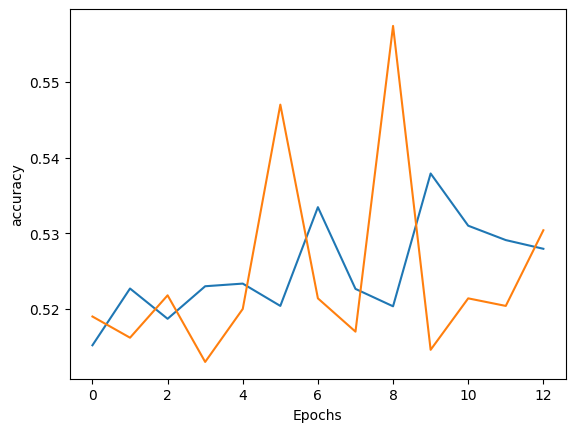

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)

plot_graphs(h, "accuracy")

L'aspect aléatoire sur les données de test peut se comprendre si une phrase dans le jeu de test ne contient que des mots inconnus du dictionnaire, alors il sera réduit à un vector "OOV"

# Vocab Size

On peut réduire le vocab_size, mais on risque de tomber dans le même problème que ci-dessus.

Si on rend le vocab_size trop grand, on risque de demander un entrainement excessif pour des mots n'apparaissant peut-être qu'une seule fois

In [ ]:
wc = tokenizer.word_counts

In [ ]:
wc =sorted(wc.items(), key=lambda x: x[1], reverse=True)

In [ ]:
import pandas as pd

df = pd.DataFrame(wc, columns=["word", "count"])

In [ ]:
df[df["count"] > 5]

,word,count
0,the,268774
1,and,131448
2,a,130000
3,of,116684
4,to,108554
...,...,...
24429,dornhelm,6
24430,donnison,6
24431,cray,6
24432,morand,6


Comparer test_set et training_set

In [ ]:
test_tokenizer = Tokenizer()
test_tokenizer.fit_on_texts(test_sentences)

In [ ]:
test_words = test_tokenizer.word_index.keys()

train_words = df['word'].tolist()

In [ ]:
len(train_words), len(test_words)

(78370, 42047)

In [ ]:
intersect = set(train_words).intersection(test_words)
len(intersect)

33879

In [ ]:
vocab_size = 29000

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf

tokenizer = Tokenizer(oov_token="<OOV>", num_words=vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=120, padding="post", truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=120, padding="post", truncating="post")

training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 120),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)
save_best_callback = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

h = model.fit(training_padded, training_labels, epochs=50, validation_data=(test_padded, test_labels),
              callbacks=[stop_callback, save_best_callback])


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5138 - loss: 0.6930 - val_accuracy: 0.5124 - val_loss: 0.6928
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5199 - loss: 0.6926 - val_accuracy: 0.5154 - val_loss: 0.6924
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5319 - loss: 0.6925 - val_accuracy: 0.5124 - val_loss: 0.6923
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5259 - loss: 0.6924 - val_accuracy: 0.5114 - val_loss: 0.6922
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5169 - loss: 0.6924 - val_accuracy: 0.5860 - val_loss: 0.6919
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5425 - loss: 0.6921 - val_accuracy: 0.5110 - val_loss: 0.6922
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5195 - loss: 0.6919 - val_accuracy: 0.5646 - val_loss: 0.6915
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.5512 - loss: 0.6915 - val_a

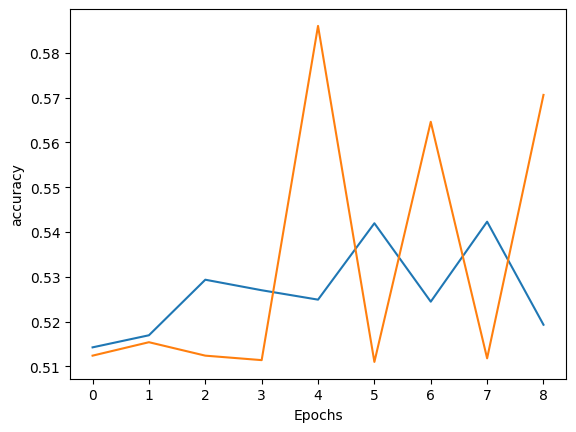

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)

plot_graphs(h, "accuracy")

# Embedding Dimension

Ce qui est recommandé est généralement de mettre une embedding dimension à la racine quatrième de la taille du vocab_size

In [ ]:
embedding_dimension = np.power(vocab_size, 1/4)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf

vocab_size = 29000
embedding_dimension = int(np.power(vocab_size, 1/4))

tokenizer = Tokenizer(oov_token="<OOV>", num_words=vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=120, padding="post", truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=120, padding="post", truncating="post")

training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)
save_best_callback = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

h = model.fit(training_padded, training_labels, epochs=50, validation_data=(test_padded, test_labels),
              callbacks=[stop_callback, save_best_callback])


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5125 - loss: 0.6930 - val_accuracy: 0.5296 - val_loss: 0.6928
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5157 - loss: 0.6927 - val_accuracy: 0.5228 - val_loss: 0.6925
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5189 - loss: 0.6926 - val_accuracy: 0.5092 - val_loss: 0.6925
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5189 - loss: 0.6925 - val_accuracy: 0.5102 - val_loss: 0.6925
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5133 - loss: 0.6923 - val_accuracy: 0.5124 - val_loss: 0.6921


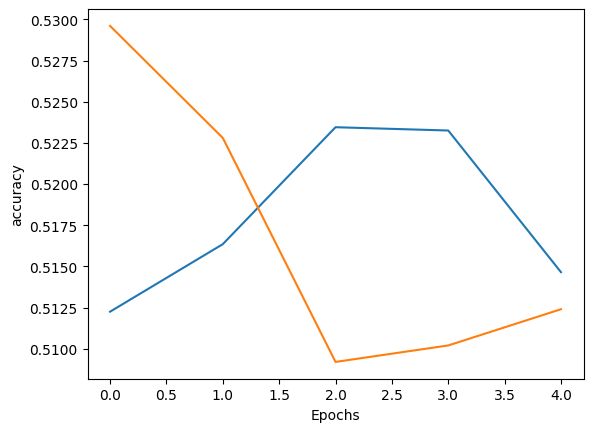

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)

plot_graphs(h, "accuracy")

# Améliorer l'architecture du modèle

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf

vocab_size = 29000
embedding_dimension = int(np.power(vocab_size, 1/4))

tokenizer = Tokenizer(oov_token="<OOV>", num_words=vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=120, padding="post", truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=120, padding="post", truncating="post")

training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)
save_best_callback = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

h = model.fit(training_padded, training_labels, epochs=50, validation_data=(test_padded, test_labels),
              callbacks=[stop_callback, save_best_callback])


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5065 - loss: 0.6932 - val_accuracy: 0.5062 - val_loss: 0.6931
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4985 - loss: 0.6932 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5043 - loss: 0.6931 - val_accuracy: 0.5092 - val_loss: 0.6931
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5045 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5038 - loss: 0.6931 - val_accuracy: 0.4978 - val_loss: 0.6931
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5104 - loss: 0.6930 - val_accuracy: 0.5074 - val_loss: 0.6930
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5063 - loss: 0.6931 - val_accuracy: 0.5094 - val_loss: 0.6931
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5091 - loss: 0.6931 - val_accuracy: 0.

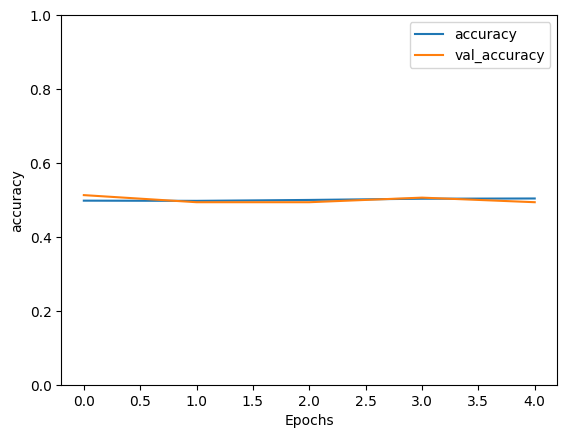

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string], label=string)
  plt.plot(history.history['val_'+string], label='val_'+string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(loc="upper right")
  plt.ylim(0, 1)


plot_graphs(h, "accuracy")

# MaxLen

In [ ]:
sentences_len = []

for sent in training_sentences:
  sentences_len.append(len(sent.split(" ")))

In [ ]:
np.array(sentences_len).min(), np.array(sentences_len).max(), np.array(sentences_len).mean(), np.median(sentences_len)

(10, 2470, 233.90165, 174.0)

# Dropout

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf

vocab_size = 29000
embedding_dimension = int(np.power(vocab_size, 1/4))
max_len = 100

tokenizer = Tokenizer(oov_token="", num_words=vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_len, padding="post", truncating="post")

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding="post", truncating="post")

training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(5, activation="relu"),
    # Ajout d'un dropout pour répartir la "charge de connaissance"
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Chgt optimizer
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Ajout du restore_best_weights sur la callback de stop
stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
save_best_callback = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)

h = model.fit(training_padded, training_labels, epochs=50, validation_data=(test_padded, test_labels),
              callbacks=[stop_callback, save_best_callback])


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6231 - loss: 0.6572 - val_accuracy: 0.8098 - val_loss: 0.4494
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8408 - loss: 0.3950 - val_accuracy: 0.8392 - val_loss: 0.3746
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8937 - loss: 0.2818 - val_accuracy: 0.8296 - val_loss: 0.3962
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9273 - loss: 0.2100 - val_accuracy: 0.8414 - val_loss: 0.4034
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9460 - loss: 0.1743 - val_accuracy: 0.8298 - val_loss: 0.4623
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9606 - loss: 0.1300 - val_accuracy: 0.8298 - val_loss: 0.4983
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9729 - loss: 0.1002 - val_accuracy: 0.8274 - val_loss: 0.5550
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9755 - loss: 0.0860 - val_accuracy

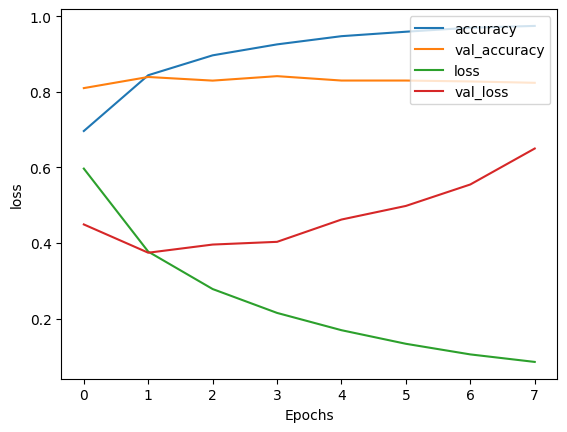

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string], label=string)
  plt.plot(history.history['val_'+string], label='val_'+string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(loc="upper right")


plot_graphs(h, "accuracy")
plot_graphs(h, "loss")

# Le transfert learning

TensorFlow Hub: repository of trained machine learning models: https://www.tensorflow.org/hub?hl=fr

In [ ]:
pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes

In [1]:
import tensorflow_hub as hub
import tensorflow as tf

embed = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")
embeddings = embed(["cat is on the mat", "dog is in the fog"])

In [2]:
embeddings

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[ 0.8666395 ,  0.35917717,  0.00579667,  0.681002  , -0.54226625,
         0.22343189, -0.38796625,  0.62195706,  0.22117122, -0.48538068,
        -1.2674141 ,  0.886369  , -0.32849073, -0.13924702, -0.53327686,
         0.5739708 , -0.05905761,  0.13629246, -1.1718255 , -0.31494334],
       [ 0.9602181 ,  0.62520486,  0.06261905,  0.37425604,  0.24782333,
        -0.39351934, -0.7418429 ,  0.56599647, -0.26197797, -0.69016844,
        -0.76565284,  0.71412426, -0.4537978 , -0.50701594, -0.8499377 ,
         0.8917156 , -0.30278975,  0.2149126 , -1.1098894 , -0.46719775]],
      dtype=float32)>

In [3]:
import tensorflow_datasets as tfds

train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [4]:
training_sentences = train_examples[:20000]
training_labels = train_labels[:20000]

test_sentences = train_examples[20000:]
test_labels = train_labels[20000:]

In [5]:
import tensorflow_hub as hub

hub_layer = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1", output_shape=[20],
                           input_shape=[], dtype=tf.string)

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential(
    [
        hub_layer,
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(3, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)
h = model.fit(training_sentences, training_labels, epochs=50,
              validation_data=(test_sentences, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 8s 10ms/step - loss: 0.6947 - accuracy: 0.5767 - val_loss: 0.6530 - val_accuracy: 0.6296
Epoch 2/50
 33/625 [>.............................] - ETA: 2s - loss: 0.6618 - accuracy: 0.6061

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 6s 10ms/step - loss: 0.6496 - accuracy: 0.6258 - val_loss: 0.6242 - val_accuracy: 0.6690
Epoch 3/50
625/625 [==============================] - 7s 11ms/step - loss: 0.6309 - accuracy: 0.6495 - val_loss: 0.6110 - val_accuracy: 0.6758
Epoch 4/50
625/625 [==============================] - 6s 10ms/step - loss: 0.6201 - accuracy: 0.6630 - val_loss: 0.5916 - val_accuracy: 0.6980
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 0.6117 - accuracy: 0.6717 - val_loss: 0.5815 - val_accuracy: 0.7020
Epoch 6/50
625/625 [==============================] - 4s 7ms/step - loss: 0.6104 - accuracy: 0.6752 - val_loss: 0.5798 - val_accuracy: 0.7042
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 0.6055 - accuracy: 0.6804 - val_loss: 0.5848 - val_accuracy: 0.7028
Epoch 8/50
625/625 [==============================] - 4s 6ms/step - loss: 0.6024 - accuracy: 0.6837 - val_loss: 0.5734 - val_accuracy: 0.7094
Epoch 9/50
625

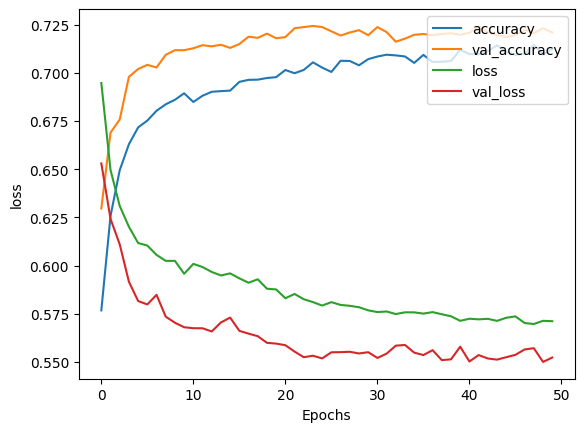

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string], label=string)
  plt.plot(history.history['val_'+string], label='val_'+string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(loc="upper right")


plot_graphs(h, "accuracy")
plot_graphs(h, "loss")